***Google Drive Connection ***

In [1]:
from google.colab import drive
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Unzipping Dataset**

In [ ]:
# zip_path = '/content/drive/MyDrive/Facial-Emotion-andBody-Language/Datasets/FE-Balanced-Data.zip'

# extract_to = os.path.dirname(zip_path)

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print('Files extracted successfully.')

In [ ]:
# posture_data_path = '/content/drive/MyDrive/Facial-Emotion-andBody-Language/Datasets/Master-Dataset-Body.zip'

# import zipfile
# with zipfile.ZipFile(posture_data_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Facial-Emotion-andBody-Language/Datasets/Master-Dataset-Body')


Data Loading

In [3]:
emotion_data_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Datasets/FINAL-NewbalancedFE'
posture_data_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Datasets/Master-Dataset-Body/Master-Dataset'

Step 1: Data Preparation on Google Colab

Preprocessing the Data
Next, we need to load the images, convert them into arrays, and split them into training and testing sets.

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os

img_size = (224, 224)
batch_size = 32

emotion_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

emotion_train_data = emotion_datagen.flow_from_directory(
    emotion_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

emotion_val_data = emotion_datagen.flow_from_directory(
    emotion_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


Found 19461 images belonging to 7 classes.
Found 4864 images belonging to 7 classes.


In [5]:
posture_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

posture_train_data = posture_datagen.flow_from_directory(
    posture_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

posture_val_data = posture_datagen.flow_from_directory(
    posture_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 2325 images belonging to 2 classes.
Found 581 images belonging to 2 classes.


Step 2: Building the Baseline CNN Model
Now, let's create a simple CNN baseline model for the facial emotion dataset.

CNN Model for Facial Emotion Recognition

In [6]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [7]:

cnn_emotion_model = create_cnn_model(img_size + (3,), num_classes=emotion_train_data.num_classes)


In [8]:
cnn_emotion_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = cnn_emotion_model.fit(
    emotion_train_data,
    epochs=10,
    validation_data=emotion_val_data
)

Epoch 1/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 6989s 11s/step - accuracy: 0.2155 - loss: 1.9542 - val_accuracy: 0.3462 - val_loss: 1.6942
Epoch 2/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2633s 4s/step - accuracy: 0.3998 - loss: 1.5702 - val_accuracy: 0.4021 - val_loss: 1.5666
Epoch 3/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2581s 4s/step - accuracy: 0.5236 - loss: 1.2989 - val_accuracy: 0.4270 - val_loss: 1.5872
Epoch 4/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2605s 4s/step - accuracy: 0.6549 - loss: 0.9466 - val_accuracy: 0.4396 - val_loss: 1.6814
Epoch 5/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2578s 4s/step - accuracy: 0.8011 - loss: 0.5656 - val_accuracy: 0.4410 - val_loss: 2.1324
Epoch 6/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2545s 4s/step - accuracy: 0.8926 - loss: 0.3151 - val_accuracy: 0.4330 - val_loss: 3.0763
Epoch 7/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2539s 4s/step - accuracy: 0.9345 - loss: 0.2078 - val_accuracy: 0.4194 - val_loss: 3.2212
Epoch 8/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2542s 4s/step - accuracy: 0.9504 - loss: 0.1660 -

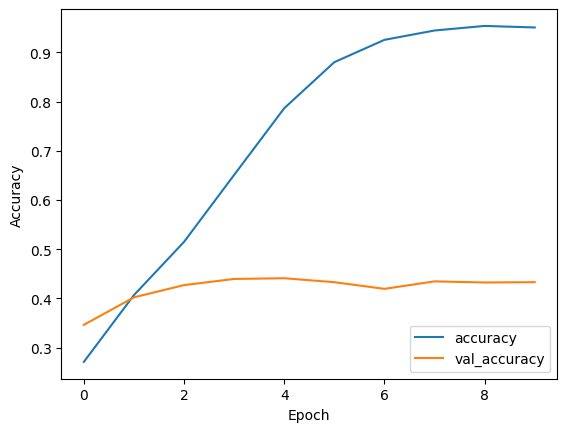

In [10]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

plot_accuracy(history)

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

plot_loss(history)

In [11]:
# model_path = "/content/drive/MyDrive/Facial-Emotion-andBody-Language/Models/Emotion_CNN_model.h5"
# cnn_emotion_model.save(model_path)

In [12]:
from tensorflow.keras import regularizers

def create_improved_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [13]:
improved_cnn_emotion_model = create_improved_cnn_model(img_size + (3,), num_classes=emotion_train_data.num_classes)

In [14]:
improved_cnn_emotion_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
improved_history = improved_cnn_emotion_model.fit(
    emotion_train_data,
    epochs=20,
    validation_data=emotion_val_data,
    callbacks=[early_stopping]
)

Epoch 1/20
609/609 ━━━━━━━━━━━━━━━━━━━━ 2630s 4s/step - accuracy: 0.1777 - loss: 2.1440 - val_accuracy: 0.2872 - val_loss: 1.9227
Epoch 2/20
609/609 ━━━━━━━━━━━━━━━━━━━━ 2678s 4s/step - accuracy: 0.2651 - loss: 1.9082 - val_accuracy: 0.3283 - val_loss: 1.8348
Epoch 3/20
609/609 ━━━━━━━━━━━━━━━━━━━━ 2693s 4s/step - accuracy: 0.2955 - loss: 1.8475 - val_accuracy: 0.3577 - val_loss: 1.7852
Epoch 4/20
609/609 ━━━━━━━━━━━━━━━━━━━━ 2680s 4s/step - accuracy: 0.3229 - loss: 1.8024 - val_accuracy: 0.3725 - val_loss: 1.7453
Epoch 5/20
536/609 ━━━━━━━━━━━━━━━━━━━━ 4:58 4s/step - accuracy: 0.3397 - loss: 1.7616

In [ ]:
# model_path = "/content/drive/MyDrive/Facial-Emotion-andBody-Language/Models/improved_Emotion_CNN_model.h5"
# improved_cnn_emotion_model.save(model_path)

In [ ]:
emotion_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

emotion_train_data_aug = emotion_datagen_aug.flow_from_directory(
    emotion_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

emotion_val_data_aug = emotion_datagen_aug.flow_from_directory(
    emotion_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

In [ ]:

def plot_training_history(history):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    axs[0].plot(history.history['accuracy'], label='Train Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    axs[1].plot(history.history['loss'], label='Train Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

plot_training_history(improved_history)

In [ ]:
aug_history = improved_cnn_emotion_model.fit(
    emotion_train_data_aug,
    epochs=30,
    validation_data=emotion_val_data_aug,
    callbacks=[lr_scheduler]
)

plot_training_history(aug_history)



val_loss_aug, val_accuracy_aug = improved_cnn_emotion_model.evaluate(emotion_val_data_aug)
print(f'Validation Accuracy after augmentation: {val_accuracy_aug:.4f}, Validation Loss: {val_loss_aug:.4f}')

y_pred_aug = improved_cnn_emotion_model.predict(emotion_val_data_aug)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)
y_true_aug = emotion_val_data_aug.classes

print(classification_report(y_true_aug, y_pred_classes_aug, target_names=emotion_train_data_aug.class_indices.keys()))

In [ ]:
# prompt: For this code print(classification_report(y_true_aug, y_pred_classes_aug, target_names=emotion_train_data_aug.class_indices.keys())) it is saying classification report is notdefine

from sklearn.metrics import classification_report

# ... (Your existing code) ...

val_loss_aug, val_accuracy_aug = improved_cnn_emotion_model.evaluate(emotion_val_data_aug)
print(f'Validation Accuracy after augmentation: {val_accuracy_aug:.4f}, Validation Loss: {val_loss_aug:.4f}')

y_pred_aug = improved_cnn_emotion_model.predict(emotion_val_data_aug)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)
y_true_aug = emotion_val_data_aug.classes

print(classification_report(y_true_aug, y_pred_classes_aug, target_names=emotion_train_data_aug.class_indices.keys()))